In [1]:
import numpy as np
import matplotlib.pyplot as plt

def graficar(f, x_i, x_f, num=1000):
    #plt.style.use("seaborn-v0_8-darkgrid")
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: gráfica de la función
    """
    x = np.linspace(x_i, x_f, num)
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(x, f(x))
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()
    return None

def metodo_biseccion(f, a, b, tol=1e-4, num=100, verbose=2):
    if (f(a)*f(b)>=0):
        if verbose==1:
            print('El método no funciona, error en los intervalos')
        return None
    n = 1
    while n <= num:
        p_i = (a + b)/2
        if verbose==1:
            print(f'ite:{n}, a:{a:.5f}, b:{b:.5f}, p_{n}:{p_i:.5f}')
        if f(p_i) == 0:
            if verbose==1:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(b - a)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def metodo_regulafalsi(f, a, b, tol=1e-4, num=100, verbose=2):
    if (f(a)*f(b)>=0):
        if verbose==1:
            print('El método no funciona, error en los intervalos')
        return None
    n = 1
    p_0 = a
    while n <= num:
        p_i = a - f(a)*((b-a)/(f(b) - f(a)))
        if verbose==1:
            print(f'ite:{n}, a:{a:.9f}, b:{b:.9f}, p_{n}:{p_i:.9f}')
        if f(p_i) == 0:
            if verbose==1:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(p_i - p_0)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
        p_0 = p_i
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def metodo_newton_raphson(f, df, p_0, tol=1e-4, num=100, verbose=2):
    n = 1
    if verbose==1:
        print(f'ite:0, p_0:{p_0:.9f}')
    while n <= num:
        if df(p_0) == 0:
            print('El método no funciona, df(p_0) = 0')
        p_i = p_0 - f(p_0)/df(p_0)
        if verbose==1:
            print(f'ite:{n}, p_{n}:{p_i:.9f}')
        if f(p_i) == 0:
            if verbose==2:
                print(f'Solución exacta encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i
        error = abs(p_i - p_0)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i
        n += 1
        p_0 = p_i
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def metodo_secante(f, p_i, p_j, tol=1e-4, num=100, verbose=True):
    n = 1
    if verbose:
        print(f'ite:0, p_i:{p_i:.9f}, p_j:{p_j:.9f}')
    while n <= num:
        if f(p_i) - f(p_j) == 0:
            print('El método no funciona, df(p_0) = 0')
        p_n = p_i - f(p_i)*((p_j - p_i)/(f(p_j)-f(p_i)))
        if verbose:
            print(f'ite:{n}, p_j:{p_j:.9f}, p_{n}:{p_n:.9f}')
        if f(p_n) == 0:
            if verbose:
                print(f'Solución exacta encontrada: {p_n}')
            return p_n
        error = abs(p_n - p_j)
        if error <= tol:
            if verbose:
                print(f'Solución aproximada encontrada: {p_n}')
                print(f'número de iteraciones: {n}')
            return p_n
        n += 1
        p_i, p_j = p_j, p_n
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def met_punto_fijo(g, p_0, tol=1e-4, n=200, verbose=True):
    """
    Método del punto fijo
    :param g: Funcion transformada -> punto fijo
    :param p_0: semilla
    :param tol: toleracia, criterio de parada
    :param n: número máximo de iteraciones, criterio de parada
    :param verbose:
    :param print_error:
    :param deploy_error:
    :return: solución exacta o aproximada, si tiene.
    """
    i = 1
    lista_errores = list()
    while i <= n:
        try:
            p_i = g(p_0)
            e_abs = abs(p_0 - p_i)
            lista_errores.append(e_abs)
            if verbose:
                print(f'ite {i:<2}: p_{i - 1:<2}={p_0:.5f} p_{i:<2}={p_i:.7f}'
                  f' | e_abs: {e_abs:e}')
            if g(p_i) == p_i:
                print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
                return p_i

            if e_abs < tol:
                print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
                return p_i

        except OverflowError:
            print('solución no encontrada, OverflowError')
            return None
        p_0 = p_i
        i += 1
    print('solución no encontrada, iteraciones agotadas')
    return None

# Ejercicio 1
La planificación financiera es una parte importante de la vida y de la gestión económica. Para alcanzar metas financieras específicas, es necesario conocer las herramientas matemáticas adecuadas para realizar cálculos precisos. Uno de estos cálculos se puede realizar utilizando la ecuación de valor acumulado para una cuenta de ahorros en la que se realizan depósitos periódicos
$$A = \dfrac{P}{i} \left( \left(1 + i\right)^n -1\right)$$
donde $A$ es la cantidad de dinero acumulado en la cuenta, $P$ es el valor de cada pago periódico, $i$ es el interés por periodo y $n$ es el número de periodos. Esta ecuación permite calcular la cantidad total de dinero acumulado en la cuenta, considerando el monto de los pagos, la tasa de interés y el número de períodos.

Suponga que un ingeniero espera tener en su cuenta de ahorros 19.5 millones de pesos en dos años para pagar sus estudios de posgrado. Él se propone ahorrar 750,000 pesos mensualmente para alcanzar su meta. Para saber el mínimo interés que necesitará para lograrlo, se puede utilizar la ecuación de valor acumulado.

Es importante destacar que se asume que el interés se compone mensualmente ($n=12$), lo que implica que cada mes se añade un pequeño porcentaje del valor acumulado a la cuenta, generando intereses sobre intereses. Conociendo el valor de cada pago periódico, la cantidad de tiempo que se desea ahorrar, y la cantidad de dinero total que se desea acumular, se puede determinar el mínimo interés mensual que el ingeniero necesitará para cumplir su objetivo financiero.

Con los datos dados, determine el mínimo interés mensual que el ingeniero necesitará para ahorrar 19.5 millones de pesos en dos años.

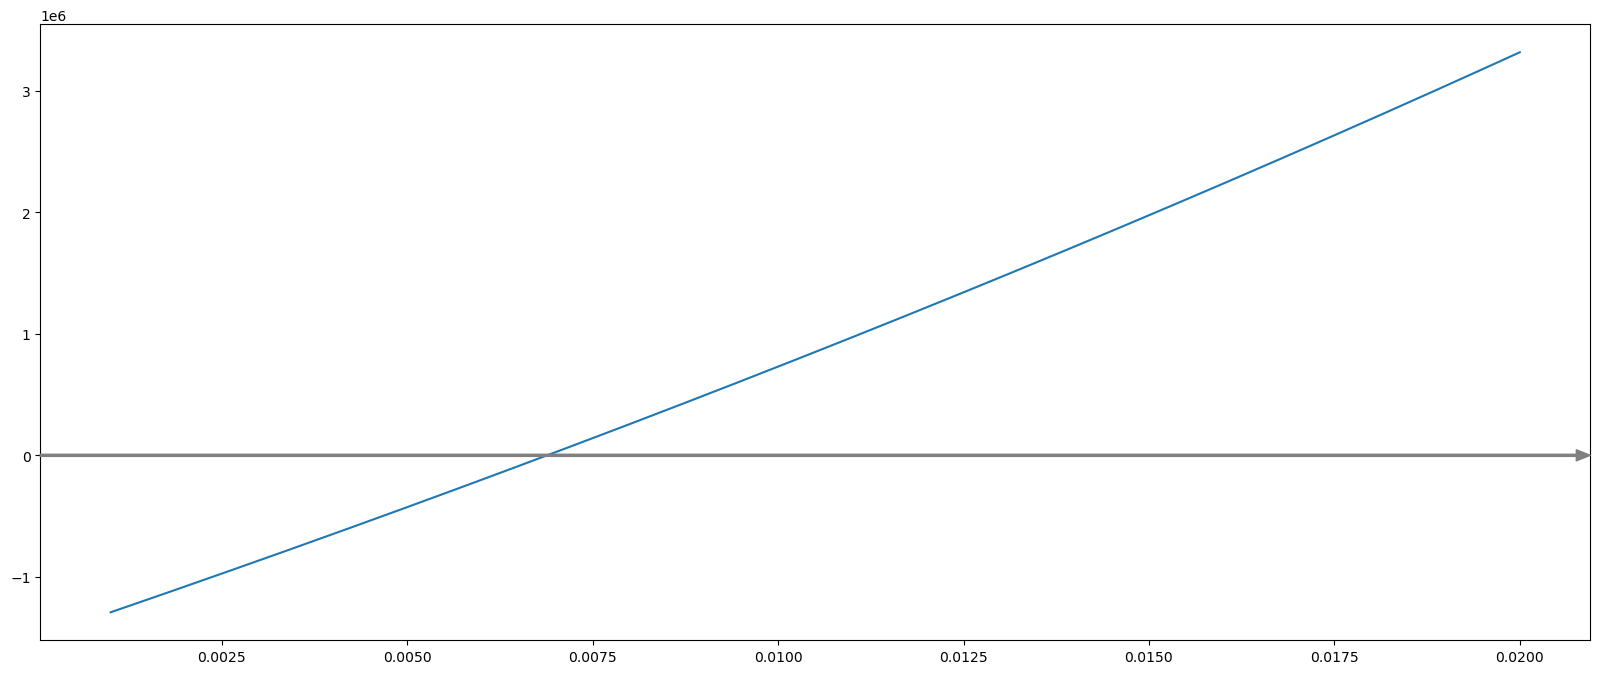

In [35]:
P = 750000
n = 24
A = 19500000
f = lambda x: (P/x)*((1+x)**n - 1) - A
graficar(f, 0.001, 0.02)

In [37]:
metodo_regulafalsi(f, 0.001, 0.02)

Solución aproximada encontrada: 0.006880781423895586
número de iteraciones: 3


0.006880781423895586

# Ejercicio 2
Realice las gráficas de $f(x)= e^{0.8x} - 2$ y $g(x)= \cos(2e^x)$ sobre el intervalo $[0,1.5]$ . Luego encuentre todos los puntos donde ambas funciones se cortan. Puede usar cualquier método visto, utilice una precisión de $10^{-5}$.

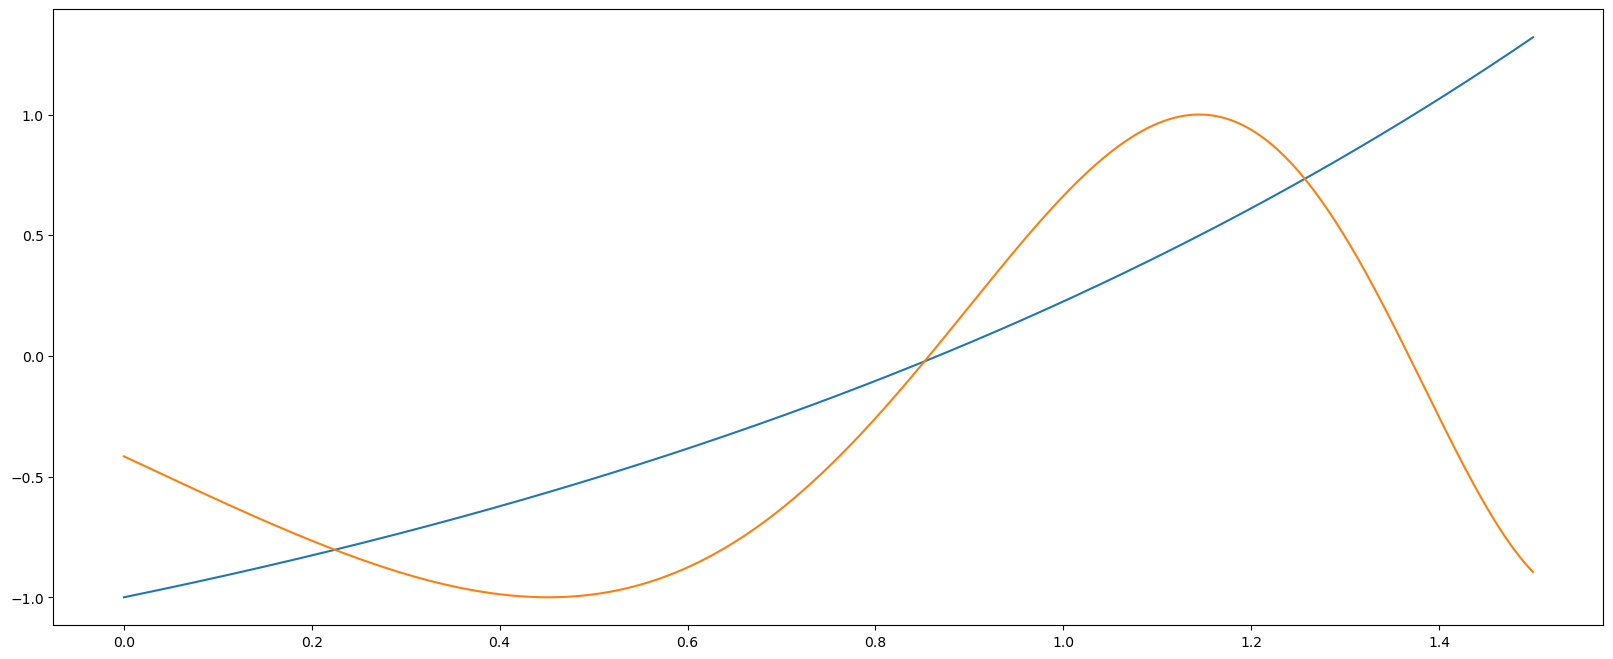

In [18]:
import matplotlib.pyplot as plt
import numpy as np
f_2 = lambda x: np.exp(0.8*x) - 2
g_2 = lambda x: np.cos(2*np.exp(x))
x = np.linspace(0, 1.5, 1000)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(x, f_2(x))
ax.plot(x, g_2(x))
plt.show()

In [22]:
fun = lambda x: f_2(x) - g_2(x)
d_fun = lambda x: 0.8*np.exp(0.8*x) + np.sin(2*np.exp(x))*2*np.exp(x)
metodo_newton_raphson(fun, d_fun, 0.2, tol=1e-5)
metodo_newton_raphson(fun, d_fun, 0.8, tol=1e-5)
metodo_newton_raphson(fun, d_fun, 1.2, tol=1e-5)

Solución aproximada encontrada: 0.22453739078759297
número de iteraciones: 3
Solución aproximada encontrada: 0.8522458192879383
número de iteraciones: 3
Solución aproximada encontrada: 1.2570715564463861
número de iteraciones: 4


1.2570715564463861

# Ejercicio 3
La velocidad vertical de un cohete se calcula con el modelo:
$$v = u \ln \left(\dfrac{m_0}{m_0 - q \cdot t}\right) - g \cdot t$$
donde $v=$ velocidad vertical, $u=$ velocidad con la que se expele el combustible en relación con el cohete, $m_0 =$ masa inicial del cohete en el momento $t=0$, $q=$ tasa de consumo de combustible y $g = 9.81\ m/s^2$ la aceleración de la gravedad hacia abajo.
Si $u=2200\ m/s$, $m_0=160000\ kg$ y $q=2680\ kg/s$, calcule el momento en que $v=1000\ m/s$. Calcule el resultado con una precisión de $10^{-4}$.

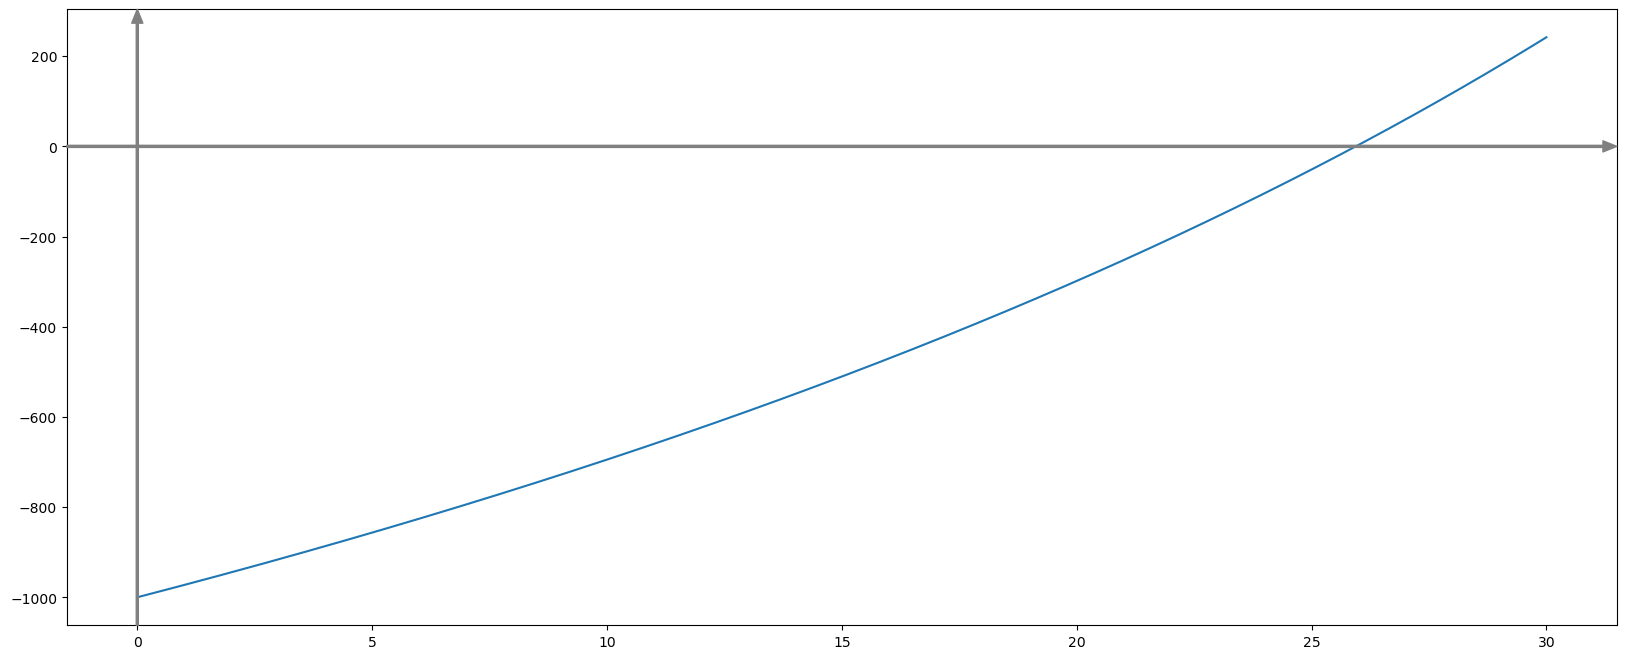

In [26]:
v, g, m_0, u, q = 1000, 9.8, 160000, 2200, 2680
f_3 = lambda t: u*np.log((m_0)/(m_0 - q*t)) - g*t - v
graficar(f_3, 0, 30)

In [28]:
metodo_secante(f_3, 20, 21, tol=1e-4)

ite:0, p_i:20.000000000, p_j:21.000000000
ite:1, p_j:21.000000000, p_1:26.443183380
ite:2, p_j:26.443183380, p_2:25.899638548
ite:3, p_j:25.899638548, p_3:25.942019338
ite:4, p_j:25.942019338, p_4:25.942393261
ite:5, p_j:25.942393261, p_5:25.942392982
Solución aproximada encontrada: 25.9423929821841
número de iteraciones: 5


25.9423929821841